<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [3]:
fullpath = glob.glob('../../data_final/SM_freq_shift_ref_full.pkl')
full = pickle.load(open(fullpath[0],'rb'))
full.keys()

dict_keys(['xmeas', 'ymeas', 'yerr', 'ytheo', 'kint', 'kext', 'temp', 'dkint', 'dkext', 'klabel', 'templabel', 'xlabel', 'ylabel'])

In [4]:
zoompath = glob.glob('../../data_final/SM_freq_shift_ref.pkl')
zoom = pickle.load(open(zoompath[0],'rb'))
zoom.keys()

dict_keys(['xmeas', 'ymeas', 'yerr', 'ytheo', 'xlabel', 'ylabel'])

In [5]:
dpi = 1000
annsz = 8
figtextsize=10

In [6]:
import matplotlib
cmap = matplotlib.cm.get_cmap('YlGn_r')

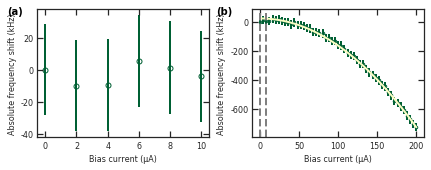

In [9]:
plt.style.use('../my_rcparams.mplstyle')

fig = plt.figure(figsize=cm2inch(17.6,6))
gs = gridspec.GridSpec(1, 2, wspace=0.25)

axa = fig.add_subplot(gs[0,0])
plt.errorbar(zoom['xmeas'],zoom['ymeas'],fmt='o',yerr=zoom['yerr'],c=cmap(0.1),markerfacecolor='none',zorder=-1)
alims = plt.gca().get_xlim()
blims = plt.gca().get_ylim()
plt.xlabel(r'Bias current (µA)')
plt.ylabel('Absolute frequency shift (kHz)')
# plt.plot(full['xmeas'],(full['ytheo']-full['ytheo'][0])/1e3,c=cmap(0.9),zorder=999)
# plt.xlim(alims)
# plt.ylim(blims)


axb = fig.add_subplot(gs[0,1])
plt.axvline(0,c='grey',ls='--')
plt.axvline(8,c='grey',ls='--')
plt.errorbar(full['xmeas'],(full['ymeas']-full['ymeas'][0])/1e3,fmt='.',yerr=full['yerr']/1e3,
             c=cmap(0.1),markerfacecolor='none',zorder=-9)
plt.plot(full['xmeas'],(full['ytheo']-full['ymeas'][0])/1e3,c=cmap(0.9),zorder=-1)
plt.xlabel(r'Bias current (µA)')
plt.ylabel('Absolute frequency shift (kHz)')

    
axa.text(-0.13,0.98, '(a)', fontsize=figtextsize,color='black', weight='bold', transform=axa.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
axb.text(-0.16,0.98, '(b)', fontsize=figtextsize,color='black', weight='bold', transform=axb.transAxes, verticalalignment = 'center', horizontalalignment = 'center')

plt.savefig('SM_frequency_shift_ref.pdf',bbox_inches='tight',dpi=dpi)
plt.show()
plt.close()